# **Mesurer les émissions CO2 de son modèle : codecarbon**

**Bienvenue dans ce TP dédié à la mesure de l'impact environnemental des LLM.**

Ce notebook a pour objectif de vous familiariser avec la librairie `codecarbon`.  
Vous suivrez une série d'exemples pas à pas jusqu'à atteindre la section **'Playground'** où vous manipulerez différents modèles et cas d'usage pour comparer leur impact environnemental.

🤔 **Pour les curieux nous avons ponctué le notebook de sections explicatives  (méthodologie, information sur la librairie etc.), elles sont optionnelles.**

### **Mesurer les impacts environnementaux**



#### `🤔` **Qu'est-ce qu'on mesure ?**

**Le CO₂eq**   
Indicateur global d'impact climatique, le **CO₂eq** (dioxyde de carbone équivalent) quantifie les émissions de tous les gaz à effet de serre (GES), en les convertissant en une unité commune : l'équivalent dioxyde de carbone, selon leur potentiel de réchauffement global (PRG) sur 100 ans.  


| Gaz à effet de serre | PRG (100 ans)     | Durée de vie atmosphérique | Principales sources                                           |
|----------------------|-------------------|-----------------------------|---------------------------------------------------------------|
| CO₂ (Dioxyde de carbone) | 1                 | 100 à 1 000 ans             | Combustion fossile, déforestation, cimenterie                 |
| CH₄ (Méthane)           | 28           | ~12 ans                     | Élevage (ruminants), décharges, fuites de gaz, riziculture, procédés industriels   |
| N₂O (Protoxyde d'azote) | 273         | ~114 ans                    | Agriculture, procédés industriels, utilisation d'engrais         |
| HFC (Hydrofluorocarbures) | 12 à 14 600     | Quelques années à siècles   | Réfrigérants, climatisation, mousses isolantes               |
| PFC (Perfluorocarbures) | 7 000 à 12 400   | Jusqu'à 50 000 ans          | Industrie de l'aluminium, électronique                       |
| SF₆ (Hexafluorure de soufre) | 24 300       | ~3 200 ans                  | Équipements électriques, isolants, industrie du magnésium    |
| NF₃ (Trifluorure d'azote) | 17 400          | ~740 ans                    | Fabrication de semi-conducteurs, écrans plats, photovoltaïque |

sources : [wiki-fr-PRG](https://fr.wikipedia.org/wiki/Potentiel_de_r%C3%A9chauffement_global), [wiki-en-GWP](https://en.wikipedia.org/wiki/Global_warming_potential), [GHG-protocol-GWP](https://ghgprotocol.org/sites/default/files/2024-08/Global-Warming-Potential-Values%20%28August%202024%29.pdf)


**L'empreinte carbone**  
L'empreinte carbone c'est la quantité totale de gaz à effet de serre (GES) émise directement ou indirectement par une activité, un individu, une organisation, un produit ou un service, exprimée en équivalent dioxyde de carbone (CO₂e), sur l'ensemble de sa chaine de valeur (production, usage, transport, fin de vie...). C'est la somme globale des émissions CO2eq associées.

- Scope 1 : émissions directes des infrastructures exploitées en propre (ex. datacenters internes).   
- Scope 2 : émissions indirectes liées à l'électricité consommée pour faire fonctionner les équipements.
- Scope 3 : autres émissions indirectes (ex. fabrication, transport, l'usage et fin de vie des équipements et services.).   

**Dans le cas de codecarbon, nous mesurons seulement les émissions directes**

**L'analyse de cycle de vie**  
L'analyse de cycle de vie c'est une méthode normalisée (ISO 14040-44) qui évalue tous les **impacts environnementaux** d'un produit, service ou processus, **de sa naissance à sa fin de vie**.

l'ACV mesure non seulement l'impact des activités sur le changement climatique  mais aussi l'impact sur **d'autres phenomènes environnementaux** :

| **Catégorie d'impact**                   | **Ce que ça mesure**                                          | **Unité typique**                          |
| ---------------------------------------- | ------------------------------------------------------------- | ------------------------------------------ |
| **Changement climatique**                | Emissions de gaz à effet de serre                             | kg CO₂ équivalent                          |
| **Appauvrissement de la couche d'ozone** | Impact des substances détruisant l'ozone stratosphérique      | kg CFC-11 équivalent                       |
| **Acidification**                        | Émissions de substances acidifiantes (SO₂, NOx…)              | kg SO₂ équivalent                          |
| **Eutrophisation**                       | Enrichissement des milieux aquatiques (nitrates, phosphates…) | kg PO₄³⁻ équivalent                        |
| **Formation d'ozone photochimique**      | Smog estival, impact sur la santé et les écosystèmes          | kg C₂H₄ équivalent                         |
| **Écotoxicité aquatique**                | Toxicité pour la faune et la flore aquatique                  | CTUe (Comparative Toxic Unit, ecotoxicity) |
| **Consommation d'eau**                   | Quantité d'eau douce utilisée                                 | m³                                         |
| **Épuisement des ressources abiotiques** | Consommation de ressources minérales ou fossiles              | kg Sb équivalent, MJ                       |
| **Consommation d'énergie primaire**      | Utilisation d'énergie (renouvelable ou non)                   | MJ                                         |


L'ACV est donc une approche **multi-critères** mais aussi **multi-étapes**, qui prend en compte **toutes les étapes du cycle de vie** :
- l'extraction, l'approvisionnement et la transformation des matières premières ;
- la fabrication, l'assemblage, l'emballage ou la construction ;
- la mise en circulation, la distribution et la commercialisation du produit fini ;
- le déballage, l'utilisation et l'entretien ;
- la fin de vie, la collecte, le transport, le recyclage, le traitement des déchets, etc.

**Dans le cas de CodeCarbon, on mesure uniquement l'empreinte carbone (CO₂eq), généralement sur le scope 1. Il ne s'agit donc pas d'une analyse de cycle de vie complète.**

#### `🤔` **Pourquoi on parle beaucoup de CO₂eq et pas des autres impacts environnementaux?**  

**La vie sur Terre est conditionnée par les interactions entre des processus biologiques, physiques et chimiques.** L'équipe internationale de chercheurs dirigée par Johan Rockström du SRC, est parvenue à en identifier neuf. Elle a établi, pour chacun d'entre eux, les seuils à ne pas dépasser, sous peine de provoquer des modifications brutales et irréversibles des équilibres naturels

Les 9 limites planétaires :
- le changement climatique ;
- l'érosion de la biodiversité ;
- la perturbation des cycles de l'azote et du phosphore ;
- le changement d'usage des sols ;
- le cycle de l'eau douce ;
- l'introduction d'entités nouvelles dans la biosphère ;
- l'acidification des océans ;
- l'appauvrissement de la couche d'ozone ;
- l'augmentation de la présence d'aérosols dans l'atmosphère.

**Alors pourquoi on parle beaucoup de changement climatique et moins des autres limites ?**

* Le changement climatique est considéré comme l'enjeu environnemental mondial **le plus urgent**.
* Les émissions carbone sont l'**indicateur principal du réchauffement climatique**, et la mesure en CO₂eq permet de les exprimer en unifiant tous les gaz à effet de serre dans une seule unité lisible.
* Les émissions carbone sont **plus faciles à mesurer et à comparer** que les autres critères environnementaux (comment mesurer l'impact de ses activités sur l'érosion de la biodiversité?).
* C'est le **critère retenu par les réglementations et les accords mondiaux** (ex. : Accords de Paris) pour fixer les objectifs de réduction.
* Les émissions carbone sont également plus faciles à communiquer (réduire son empreinte carbone parle davantage que "réduire l'acidification des océans") ; pédagogiquement c'est **plus efficace pour sensibiliser le grand public et les décideurs**.

⚠️ Mais effectivement, ça **ne reflète pas l'ensemble des impacts environnementaux** (eau, biodiversité, pollution…) et reste donc **limitatif**. Idéalement il faudrait adopter une approche multi-critères globale.


[En savoir plus sur les 9 limites planétaires](https://www.notre-environnement.gouv.fr/themes/societe/article/limites-planetaires)

#### `🤔` **Comment on mesure le CO₂eq dans le numérique ?**  

Dans le cas de la mesure des **émissions directes**, on se base sur la **consommation d'électricité**:

```
émissions (CO₂eq) = énergie consommée (kWh) * intensité carbone (gCO₂eq/kWh)
```

`intensité carbone` (gCO₂eq/kWh)  : Quantité de CO₂e émise pour produire 1 kWh d'électricité, elle dépend du mix énergétique du pays ou du fournisseur (charbon, nucléaire, éolien, etc.).  
https://app.electricitymaps.com/map/72h/hourly  

#### `🤔` **Quels sont les facteurs d'influence sur les emissions CO₂eq d'un modèle ?**  

Pour les émissions directes:   
- Le choix du modèle  
  - Taille du modèle : nombre de parametres, précision
  - et donc le type de modèle / systeme de modèle / architecture : ML vs DL vs GenAI, dense vs MOE, monomodal vs multimodal, standard vs reasoning, RAG, agentique
  - modèle peut-etre déjà optimisé avant téléchargement : distillation, quantisation, pruning
- Les optimisations
  - Le code : gestion de la mémoire, processing par batch, type de vectorisation, choix des librairies
  - R&D : recherche d'hyperparametres, nb de modèles testés
  - En entrainement : nb epochs, taille du dataset, batch size, taille de la fenetre de contexte
  - En inference : nombre de tokens input/output (fenetre de contexte), prompt engineering, batch inference, caching
  - En production : optimisations supplémentaire de la taille du modèle (pruning, quantization, distillation)
- L'infrastructure
  - Type de composants utilisés : GPU vs TPU vs CPU, type de GPU, efficacité energetiques des composants (TDP, TFLOPS/W)
  - Provider cloud : Azure, AWS, GCP (efficacité energetique des datacenters (PUE), type de refroidissement
  - Localisation géographique (intensité carbone locale dépends du mix énergétique de la région)
  - En production : mutualisation des GPU, gestion des ressources cloud en fonction des besoins réels (autoscaling, mise en veille auto)




#### **Quelles librairies pour mesurer les émissions carbones de l'IA générative ?**

* **[CodeCarbon](https://mlco2.github.io/codecarbon/)** : outil généraliste, permettant de mesurer la consommation énergétique et d'estimer les émissions de GES de modèles custom et **LLM open-weights**. Permet d'estimer les émissions CO2eq pendant les différentes phases du projet, dont l'entrainement et l'inférence.
* **[EcoLogits](https://ecologit.ai)** : outil centré sur l'estimation de l'impact environnemental de **LLM propriétaires**, utilisée via des **API** (OpenAI, Anthropic, etc.).
* **[cloud carbon footprint](https://www.cloudcarbonfootprint.org/)** : permet d'estimer les émissions CO2eq de l'utilisation de ressources cloud, peut être aggrégé par fournisseur cloud, projet, et produit. [Demo](https://demo.cloudcarbonfootprint.org/)
* les outils des providers cloud:
  * **[GCP carbon footprint](https://cloud.google.com/carbon-footprint?hl=en)**
  * **[AWS carbon footprint](https://aws.amazon.com/aws-cost-management/aws-customer-carbon-footprint-tool/)**
  * **[Azure carbon optimization](https://learn.microsoft.com/en-us/azure/carbon-optimization/view-emissions)**


# **Mesurer les émissions CO2 avec codecarbon**

![CodeCarbon Banner](https://mlco2.github.io/codecarbon/_images/banner.png)



## **Présentation de codecarbon**   



[repo github](https://github.com/mlco2/codecarbon)

- **CodeCarbon** est un package Python léger qui aide les développeurs à estimer l'**empreinte carbone de leur code** en suivant la consommation d'énergie et en la convertissant en **équivalents CO₂ (CO₂eq)**.
- Un **équivalent CO₂ (CO₂eq)** est une mesure standardisée qui exprime l'impact climatique de tous les gaz à effet de serre en termes de quantité de CO₂ ayant le même potentiel de réchauffement.
- Dans le contexte informatique, les émissions proviennent principalement de la **consommation d'électricité**. Celles-ci sont mesurées en **kg d'équivalent CO₂ par kilowattheure (kWh)**, en fonction des mix énergétiques régionaux (par exemple, combustibles fossiles vs énergies renouvelables).
- CodeCarbon se concentre sur les **émissions opérationnelles directes**, c'est-à-dire l'énergie consommée par le **CPU, le GPU et la RAM** pendant l'exécution du code.
- Les **émissions du cycle de vie** (fabrication du matériel, refroidissement des centres de données) ne sont **pas incluses**. - Les valeurs d’émissions sont des **estimations** et non des mesures.

**Fonctionnalités**
- Suivi des émissions de **systèmes entiers** ou de **blocs de code spécifiques**
- Prise en charge des environnements **en ligne** et **hors ligne**
- Compatible avec les **machines locales** et l'**infrastructure cloud**
- Enregistrement automatique des métriques dans :
  - un **fichier CSV** local
  - la **console terminal**
  - dans l'**environnement de code** (via les valeurs de retour)
- Intégration aux **outils de surveillance et d'observabilité** (par exemple, Prometheus, Logfire, enregistreurs personnalisés)
- Offre des tableaux de bord **en ligne** et **hors ligne** pour la visualisation des émissions

CodeCarbon tente de déduire automatiquement les paramètres à partir de l'adresse IP et du matériel local

## 🚀 **Quickstart**
**Dans cette section, suivez un pas à pas, vous pouvez executer les cellules pour reproduire l'exemple.**  
Si vous connaissez déjà la librairie vous pouvez passer directement à la partir 'Playground'.

#### Prérequis
- version Python 3.8+  

In [ ]:
!python --version

Python 3.11.12


In [ ]:
# @title **Installation de `codecarbon`***

%%capture
!pip install codecarbon

In [ ]:
!codecarbon --version

codecarbon v3.0.1


📌 Note: Sur Colab, `codecarbon` fonctionne uniquement avec les GPU **Nvidia**.  
*Il n'y a pas assez d'informations disponibles sur les GPU Google.*

Les GPU Nvidia disponibles sur Colab:
- A100 GPU (Nvidia)
- L4 GPU (Nvidia)
- T4 GPU (Nvidia) *(disponible dans la version gratuite)*


### **Suivre une tache avec `codecarbon`**

In [ ]:
from transformers import pipeline
from codecarbon import EmissionsTracker # on utilise la classe EmissionsTracker pour suivre les émissions
import gc
import torch

# On instancie notre tracker
tracker = EmissionsTracker(
    measure_power_secs=5, # fréquence de la prise de mesure
    experiment_id="704c2a0a-ec31-4dd6-b9d9-4785089f522d",
    log_level="debug"
    )

# On charge le modèle à partir d'une pipeline de huggingface
print('\nLoading the model...\n')
pipe = pipeline("text-generation", model="Qwen/Qwen2.5-1.5B-Instruct")

# On lance la mesure de la génération
question = "Who are you?"
messages = [
    {"role": "user", "content": question},
]

tracker.start()

print('\nGenerating...\n')
response = pipe(messages, max_new_tokens=200)

tracker.stop()

# On libère les ressources
del pipe
gc.collect()
torch.cuda.empty_cache()

[codecarbon WARNING @ 12:38:02] Multiple instances of codecarbon are allowed to run at the same time.
[codecarbon INFO @ 12:38:02] [setup] RAM Tracking...
[codecarbon INFO @ 12:38:02] [setup] CPU Tracking...
[codecarbon WARNING @ 12:38:03] We saw that you have a Intel(R) Xeon(R) CPU @ 2.00GHz but we don't know it. Please contact us.
[codecarbon DEBUG @ 12:38:03] is_psutil_available() : psutil.cpu_times().nice is too small : 0.0 !
[codecarbon DEBUG @ 12:38:03] Not using PowerGadget, an exception occurred while instantiating IntelPowerGadget : Platform not supported by Intel Power Gadget
[codecarbon DEBUG @ 12:38:03] Not using the RAPL interface, an exception occurred while instantiating IntelRAPL : Intel RAPL files not found at /sys/class/powercap/intel-rapl/subsystem on linux
[codecarbon DEBUG @ 12:38:03] Not using PowerMetrics, an exception occurred while instantiating Powermetrics : Platform not supported by Powermetrics
[codecarbon WARNING @ 12:38:03] No CPU tracking mode found. Fal


Loading the model...



Device set to use cuda:0



Generating...



[codecarbon DEBUG @ 12:38:21] RAM power estimation: 10.00W for 12.67GB
[codecarbon INFO @ 12:38:21] Energy consumed for RAM : 0.000008 kWh. RAM Power : 10.0 W
[codecarbon DEBUG @ 12:38:21] Done measure for RAM - measurement time: 0.0021 s - last call 2.88 s
[codecarbon INFO @ 12:38:21] Delta energy consumed for CPU with constant : 0.000034 kWh, power : 42.5 W
[codecarbon INFO @ 12:38:21] Energy consumed for All CPU : 0.000034 kWh
[codecarbon DEBUG @ 12:38:21] Done measure for CPU - measurement time: 0.0013 s - last call 2.88 s
[codecarbon INFO @ 12:38:21] Energy consumed for all GPUs : 0.000051 kWh. Total GPU Power : 63.735125621824054 W
[codecarbon DEBUG @ 12:38:21] Done measure for GPU - measurement time: 0.0028 s - last call 2.89 s
[codecarbon INFO @ 12:38:21] 0.000093 kWh of electricity used since the beginning.
[codecarbon DEBUG @ 12:38:21] last_duration=2.8820974120000074
------------------------
[codecarbon DEBUG @ 12:38:21] We apply an energy mix of 471 g.CO2eq/kWh for Singapor

In [ ]:
# @title On récupère la réponse
def print_response(response):
  print()
  question = response[0]['generated_text'][0]['content']
  answer = response[0]['generated_text'][1]['content']
  words = answer.split()
  print('Question:', question)
  print('Answer:')
  for line in answer.split('. '):
    print(f'{line}.')
  print()

print_response(response)


Question: Who are you?
Answer:
I am Qwen, a large language model developed by Alibaba Cloud.
I was trained on massive amounts of text data and can generate human-like responses to various questions and tasks.
How may I assist you today?.



In [ ]:
# @title On récupère les mesures
print(f"Energy consumption: {tracker.final_emissions_data.energy_consumed:.6f} kWh")
print(f"GHG emissions:      {tracker.final_emissions_data.emissions:.6f} kgCO2eq")

Energy consumption: 0.000078 kWh
GHG emissions:      0.000036 kgCO2eq


In [ ]:
# @title Et voici toutes les données fournies par le tracker
def format_tracker_data(tracker):
  print('\ntracker data :')
  for k, v in tracker.final_emissions_data.values.items():
    print(f"{k:<20}: {v}")

format_tracker_data(tracker)


tracker data :
timestamp           : 2025-05-16T07:24:54
project_name        : codecarbon
run_id              : 600a99e4-cc3d-4705-bfbc-54845827b838
experiment_id       : 5b0fa12a-3dd7-45bb-9766-cc326314d9f1
duration            : 2.9066334810000285
emissions           : 3.648885660588503e-05
emissions_rate      : 1.2553649039138921e-05
cpu_power           : 42.5
gpu_power           : 43.75177447266417
ram_power           : 10.0
cpu_energy          : 3.421574927847281e-05
gpu_energy          : 3.524725042000003e-05
ram_energy          : 8.04374248611121e-06
energy_consumed     : 7.750674218458404e-05
country_name        : Singapore
country_iso_code    : SGP
region              : 
cloud_provider      : 
cloud_region        : 
os                  : Linux-6.1.123+-x86_64-with-glibc2.35
python_version      : 3.11.12
codecarbon_version  : 3.0.1
cpu_count           : 2
cpu_model           : Intel(R) Xeon(R) CPU @ 2.00GHz
gpu_count           : 1
gpu_model           : 1 x Tesla T4
longitude   

### **Suivre differentes taches avec `codecarbon`**

In [ ]:
from transformers import pipeline
from codecarbon import EmissionsTracker
import gc
import torch

# On instancie notre tracker
task_tracker = EmissionsTracker(
    measure_power_secs=5,
    log_level="debug"
    )

# On mesure une première tache
print('\nLoading the model...\n')
task_tracker.start_task('load_model')

pipe = pipeline("text-generation", model="Qwen/Qwen2.5-0.5B-Instruct") # On teste un nouveau modèle : Qwen 0.5B

load_model_emissions = task_tracker.stop_task()
print('load_model_emissions', load_model_emissions)

# On mesure une deuxième tache
question = "Who are you?"
messages = [
    {"role": "user", "content": question},
]
print('\nGenerating...\n')
task_tracker.start_task('inference')

response = pipe(messages, max_new_tokens=200)

generate_model_emissions = task_tracker.stop_task()
print('generate_model_emissions', generate_model_emissions)

# On n'oublie pas de stopper le tracker
task_tracker.stop()

# Et on libère les ressource
del pipe
gc.collect()
torch.cuda.empty_cache()

[codecarbon WARNING @ 07:25:06] Multiple instances of codecarbon are allowed to run at the same time.
[codecarbon INFO @ 07:25:06] [setup] RAM Tracking...
[codecarbon INFO @ 07:25:06] [setup] CPU Tracking...
[codecarbon WARNING @ 07:25:07] We saw that you have a Intel(R) Xeon(R) CPU @ 2.00GHz but we don't know it. Please contact us.
[codecarbon DEBUG @ 07:25:07] is_psutil_available() : psutil.cpu_times().nice is too small : 0.0 !
[codecarbon DEBUG @ 07:25:07] Not using PowerGadget, an exception occurred while instantiating IntelPowerGadget : Platform not supported by Intel Power Gadget
[codecarbon DEBUG @ 07:25:07] Not using the RAPL interface, an exception occurred while instantiating IntelRAPL : Intel RAPL files not found at /sys/class/powercap/intel-rapl/subsystem on linux
[codecarbon DEBUG @ 07:25:07] Not using PowerMetrics, an exception occurred while instantiating Powermetrics : Platform not supported by Powermetrics
[codecarbon WARNING @ 07:25:07] No CPU tracking mode found. Fal


Loading the model...



config.json:   0%|          | 0.00/659 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/988M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/242 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/7.30k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/2.78M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/1.67M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/7.03M [00:00<?, ?B/s]

Device set to use cuda:0
[codecarbon DEBUG @ 07:25:21] RAM power estimation: 10.00W for 12.67GB
[codecarbon INFO @ 07:25:21] Energy consumed for RAM : 0.000038 kWh. RAM Power : 10.0 W
[codecarbon DEBUG @ 07:25:21] Done measure for RAM - measurement time: 0.0061 s - last call 13.71 s
[codecarbon INFO @ 07:25:21] Delta energy consumed for CPU with constant : 0.000162 kWh, power : 42.5 W
[codecarbon INFO @ 07:25:21] Energy consumed for All CPU : 0.000162 kWh
[codecarbon DEBUG @ 07:25:21] Done measure for CPU - measurement time: 0.0045 s - last call 13.72 s
[codecarbon INFO @ 07:25:21] Energy consumed for all GPUs : 0.000095 kWh. Total GPU Power : 24.79140770225203 W
[codecarbon DEBUG @ 07:25:21] Done measure for GPU - measurement time: 0.0044 s - last call 13.73 s
[codecarbon INFO @ 07:25:21] 0.000295 kWh of electricity used since the beginning.
[codecarbon DEBUG @ 07:25:21] last_duration=13.713558947000024
------------------------
[codecarbon DEBUG @ 07:25:21] We apply an energy mix of 4

load_model_emissions EmissionsData(timestamp='2025-05-16T07:25:21', project_name='codecarbon', run_id='1b52c574-c037-4b9c-811a-70c9500b02d0', experiment_id='5b0fa12a-3dd7-45bb-9766-cc326314d9f1', duration=13.73647071199997, emissions=0.00013870650779992727, emissions_rate=1.0099387110848037e-05, cpu_power=42.5, gpu_power=24.79140770225203, ram_power=10.0, cpu_energy=0.0001619941280916671, gpu_energy=9.4542020078e-05, ram_energy=3.809324116666678e-05, energy_consumed=0.00029462938933633387, country_name='Singapore', country_iso_code='SGP', region='', cloud_provider='', cloud_region='', os='Linux-6.1.123+-x86_64-with-glibc2.35', python_version='3.11.12', codecarbon_version='3.0.1', cpu_count=2, cpu_model='Intel(R) Xeon(R) CPU @ 2.00GHz', gpu_count=1, gpu_model='1 x Tesla T4', longitude=103.8507, latitude=1.2872, ram_total_size=12.673782348632812, tracking_mode='machine', on_cloud='N', pue=1.0)

Generating...



[codecarbon DEBUG @ 07:25:26] RAM power estimation: 10.00W for 12.67GB
[codecarbon INFO @ 07:25:26] Energy consumed for RAM : 0.000051 kWh. RAM Power : 10.0 W
[codecarbon DEBUG @ 07:25:26] Done measure for RAM - measurement time: 0.0027 s - last call 4.75 s
[codecarbon INFO @ 07:25:26] Delta energy consumed for CPU with constant : 0.000056 kWh, power : 42.5 W
[codecarbon INFO @ 07:25:26] Energy consumed for All CPU : 0.000218 kWh
[codecarbon DEBUG @ 07:25:26] Done measure for CPU - measurement time: 0.0023 s - last call 4.76 s
[codecarbon INFO @ 07:25:26] Energy consumed for all GPUs : 0.000133 kWh. Total GPU Power : 28.942649852517285 W
[codecarbon DEBUG @ 07:25:26] Done measure for GPU - measurement time: 0.0027 s - last call 4.76 s
[codecarbon INFO @ 07:25:26] 0.000402 kWh of electricity used since the beginning.
[codecarbon DEBUG @ 07:25:26] last_duration=4.751895053999988
------------------------
[codecarbon DEBUG @ 07:25:26] We apply an energy mix of 471 g.CO2eq/kWh for Singapore

generate_model_emissions EmissionsData(timestamp='2025-05-16T07:25:26', project_name='codecarbon', run_id='1b52c574-c037-4b9c-811a-70c9500b02d0', experiment_id='5b0fa12a-3dd7-45bb-9766-cc326314d9f1', duration=4.7623730820000105, emissions=5.065614160205305e-05, emissions_rate=1.0637162191409854e-05, cpu_power=42.5, gpu_power=28.942649852517285, ram_power=10.0, cpu_energy=5.6140008709027546e-05, gpu_energy=3.826003060799989e-05, ram_energy=1.3199728733333416e-05, energy_consumed=0.00010759976805036088, country_name='Singapore', country_iso_code='SGP', region='', cloud_provider='', cloud_region='', os='Linux-6.1.123+-x86_64-with-glibc2.35', python_version='3.11.12', codecarbon_version='3.0.1', cpu_count=2, cpu_model='Intel(R) Xeon(R) CPU @ 2.00GHz', gpu_count=1, gpu_model='1 x Tesla T4', longitude=103.8507, latitude=1.2872, ram_total_size=12.673782348632812, tracking_mode='machine', on_cloud='N', pue=1.0)


In [ ]:
# @title On récupère la réponse

print_response(response)


Question: Who are you?
Answer:
I am Qwen, an AI language model created by Alibaba Cloud.
I was designed to assist with various tasks and provide information on a wide range of topics.
My primary goal is to help users find the answers they need quickly and accurately.
I'm available 24/7 to answer any questions or provide insights.
Is there anything specific you would like me to assist you with today?.



In [ ]:
# @title On récupère les mesures

def format_results(task, energy, emissions):
  print(f"| {task:<15}       | energy consumed : {energy:.6f} kWh | GHG emissions : {emissions:.6f} kgCO2eq |")

load_emissions = load_model_emissions.emissions
load_energy = load_model_emissions.energy_consumed

generate_emissions = generate_model_emissions.emissions
generate_energy = generate_model_emissions.energy_consumed

total_emissions = task_tracker.final_emissions_data.emissions
total_energy = task_tracker.final_emissions_data.energy_consumed


format_results('total', total_energy, total_emissions)
format_results('load model', load_energy, load_emissions)
format_results('generate', generate_energy, generate_emissions)

| total                 | energy consumed : 0.000402 kWh | GHG emissions : 0.000189 kgCO2eq |
| load model            | energy consumed : 0.000295 kWh | GHG emissions : 0.000139 kgCO2eq |
| generate              | energy consumed : 0.000108 kWh | GHG emissions : 0.000051 kgCO2eq |


### **D'autres manières d'utiliser codecarbon**

- on peut suivre les emissions d'un **système** à partir du terminal avec la **commande `codecarbon monitor`** (suivi de background jobs, pas besoin de modifier le code)   
 *le package peut aussi etre installé comme service linux avec `systemd`*  
- on peut utiliser le **décorateur `@track_emissions`** pour suivre des **fonctions** spécifiques
- on peut suivre une execution **offline** avec `OfflineEmissionsTracker()` ou le décorateur `@track_emissions(offline=True, country_iso_code="CAN")`



### **Accéder aux mesures**

In [ ]:
# @title On a vu qu'on peut récupérer les mesures directement dans le code

task_tracker.final_emissions_data

EmissionsData(timestamp='2025-05-13T08:20:30', project_name='codecarbon', run_id='104ba877-ff64-4ecf-94a8-179130c28d47', experiment_id='5b0fa12a-3dd7-45bb-9766-cc326314d9f1', duration=2.1134609020000426, emissions=0.0003605126670420784, emissions_rate=0.00017057929328189255, cpu_power=42.5, gpu_power=510.03547574900387, ram_power=10.0, cpu_energy=0.0007176213024111134, gpu_energy=0.00046064453518199905, ram_energy=0.00016883069050277802, energy_consumed=0.0013470965280958905, country_name='The Netherlands', country_iso_code='NLD', region='groningen', cloud_provider='', cloud_region='', os='Linux-6.1.123+-x86_64-with-glibc2.35', python_version='3.11.12', codecarbon_version='3.0.1', cpu_count=2, cpu_model='Intel(R) Xeon(R) CPU @ 2.00GHz', gpu_count=1, gpu_model='1 x Tesla T4', longitude=6.5664, latitude=53.2222, ram_total_size=12.673782348632812, tracking_mode='machine', on_cloud='N', pue=1.0)

In [ ]:
# @title Les mesures sont aussi accessibles par défaut dans le dossier courant
!ls

emissions_base_104ba877-ff64-4ecf-94a8-179130c28d47.csv  sample_data
emissions.csv


### On peut modifier le dossier destination des mesures avec le paramètre `output-dir`

```
EmissionsTracker(
	output_dir="emissions",
)
```

In [ ]:
# @title On peut retrouver les détails pour chaque run du tracker `EmissionsTracker()`

!cat emissions.csv

timestamp,project_name,run_id,experiment_id,duration,emissions,emissions_rate,cpu_power,gpu_power,ram_power,cpu_energy,gpu_energy,ram_energy,energy_consumed,country_name,country_iso_code,region,cloud_provider,cloud_region,os,python_version,codecarbon_version,cpu_count,cpu_model,gpu_count,gpu_model,longitude,latitude,ram_total_size,tracking_mode,on_cloud,pue
2025-05-13T08:19:28,codecarbon,4f56968b-fb09-44c2-a9a6-f6202a6c8f3e,5b0fa12a-3dd7-45bb-9766-cc326314d9f1,3.2063930330000403,2.322737727885902e-05,7.244083005359601e-06,42.5,45.28419217874115,10.0,3.771460421944476e-05,4.02114210579993e-05,8.865708133333151e-06,8.679173341077721e-05,The Netherlands,NLD,groningen,,,Linux-6.1.123+-x86_64-with-glibc2.35,3.11.12,3.0.1,2,Intel(R) Xeon(R) CPU @ 2.00GHz,1,1 x Tesla T4,6.5664,53.2222,12.673782348632812,machine,N,1.0
2025-05-13T08:20:30,codecarbon,104ba877-ff64-4ecf-94a8-179130c28d47,5b0fa12a-3dd7-45bb-9766-cc326314d9f1,2.1134609020000426,0.0003605126670420784,0.00017057929328189255,42.5,510.

In [ ]:
# @title Ainsi que le détails par taches avec `start-task` dans un fichier séparé

!cat emissions_base_104ba877-ff64-4ecf-94a8-179130c28d47.csv

task_name,timestamp,project_name,run_id,duration,emissions,emissions_rate,cpu_power,gpu_power,ram_power,cpu_energy,gpu_energy,ram_energy,energy_consumed,country_name,country_iso_code,region,cloud_provider,cloud_region,os,python_version,codecarbon_version,cpu_count,cpu_model,gpu_count,gpu_model,longitude,latitude,ram_total_size,tracking_mode,on_cloud
load_model,2025-05-13T08:20:28,codecarbon,104ba877-ff64-4ecf-94a8-179130c28d47,58.69760461299984,0.0003457592028679437,5.890651365064804e-06,42.5,26.747119797253013,10.0,0.0006928710080423616,0.000436076182194,0.00016302134324722221,0.0012919685334835838,The Netherlands,NLD,groningen,,,Linux-6.1.123+-x86_64-with-glibc2.35,3.11.12,3.0.1,2,Intel(R) Xeon(R) CPU @ 2.00GHz,1,1 x Tesla T4,6.5664,53.2222,12.673782348632812,machine,N
inference,2025-05-13T08:20:30,codecarbon,104ba877-ff64-4ecf-94a8-179130c28d47,2.0950715000003584,1.435476087248102e-05,6.852332319793619e-06,42.5,39.9067057388007,10.0,2.4661288188889026e-05,2.318224076799935e-05,5.794

## 🤔 **Méthodologie  : Comment codecarbon mesure les émissions de CO₂eq ?**


* **Formule :**  
```
CO₂eq = Intensité carbone × Énergie consommée
```

---

1. **`Intensité carbone`**  
  → Déduite à partir du **fournisseur cloud** ou de la **géolocalisation IP**   
  L'intensité carbone est la quantité de gaz à effet de serre émise par unité d'énergie produite (gCO₂e/kWh).
  Elle dépend du mix energétique de la région ou se situe le datacenter / la machine qui execute le code → [Carte de mix énergetique - Electricity Maps](https://app.electricitymaps.com/map/72h/hourly)
  * [Hypothèses pour les valeurs d'intensité carbone des fournisseurs cloud](https://github.com/mlco2/codecarbon/blob/master/codecarbon/data/cloud/impact.csv)
  * [Hypothèses pour les valeurs d'intensité carbone régionales](https://github.com/mlco2/codecarbon/blob/master/codecarbon/data/private_infra/global_energy_mix.json)
  
  → Dans Google Colab, les métadonnées d'infrastructure ne sont pas visibles → `codecarbon` se rabat sur l'adresse IP et utilise les [valeurs d'intensité carbone régionales](https://github.com/mlco2/codecarbon/blob/master/codecarbon/data/private_infra/global_energy_mix.json)

---

2. **`Énergie consommée = Puissance × Temps`**

* **Puissance :** estimée à partir de la consommation des **GPU**, **RAM** et **CPU**

  * **CPU** : suivi via des outils système (Windows/Mac/Linux) pour mesurer directement la consommation.  
    → Ces outils ne sont pas disponibles dans Colab → `codecarbon` utilise alors une **valeur approximative constante** de TDP (Thermal Design Power).
  * **GPU** : suivi via l'outil **`pynvml`** de NVIDIA.
  * **RAM** : estimée à partir du **nombre et de la taille des modules mémoire**, déduits de la RAM totale et du système.

* **Temps** : mesuré automatiquement par le **scheduler**.

En savoir plus : [lire la documentation de codecarbon](https://mlco2.github.io/codecarbon/methodology.html)

In [ ]:
# @title Les informations contenues dans l'IP

import requests
ip = requests.get('https://api.ipify.org').text # alternative !curl -s ifconfig.me
print(f"public IP address: {ip}")

geo = requests.get(f'https://ipinfo.io/{ip}/json').json()
print(f"\nInformation contained in the IP: ")
geo

public IP address: 34.142.208.183

Information contained in the IP: 


{'ip': '34.142.208.183',
 'hostname': '183.208.142.34.bc.googleusercontent.com',
 'city': 'Singapore',
 'region': 'Singapore',
 'country': 'SG',
 'loc': '1.2897,103.8501',
 'org': 'AS396982 Google LLC',
 'postal': '018989',
 'timezone': 'Asia/Singapore',
 'readme': 'https://ipinfo.io/missingauth'}

## 🤸🏻 **Playground**

### 🚀 A votre tour !



**Voici vos objectifs, vous pouvez soit créer un nouveau notebook et experimenter 'from scratch', ou bien suivre le pas à pas fourni plus bas.**

- Choisissez un modèle sur [huggingface](https://huggingface.co/models?pipeline_tag=text-generation&sort=trending) qui vous servira comme baseline.

- Partie 1 - **Comparez les émissions de différentes tâches de votre choix**, par exemple :
  - traduire une phrase courte en n'importe quelle langue - mettre un max à 50 token
  - écrire un email à son client pour lui suggerer de rajouter des mesures d'emission carbone en avançant 3 arguments importants - mettre un max à 200 token
  - écrire le compte rendu de cette journée tribu - max 1000 token

  *Vous pouvez tester différentes tailles de prompt, et différentes longueurs de sortie.*

- Partie 2 : **Comparez les émissions sur la même tache avec des modalités différentes**, par exemple  :
  - pour des [zones géographiques différentes](https://app.electricitymaps.com/map/72h/hourly) - utilisez ces [codes région](https://github.com/mlco2/codecarbon/blob/master/codecarbon/data/cloud/impact.csv)
  - entre un modèle et sa version **quantisée**
    - par ex. Qwen/Qwen2.5-1.5B-Instruct vs. unsloth/Qwen2.5-1.5B-Instruct-bnb-4bit
    - [ici la liste des modèles quantisés de Qwen/Qwen2.5-1.5B-Instruct](https://huggingface.co/models?other=base_model:quantized:Qwen/Qwen2.5-1.5B-Instruct)
  - entre un modèle standard et un **modèle de raisonnement** de taille équivalente
    - par ex. Qwen/Qwen2.5-1.5B-Instruct vs. Qwen/Qwen3-1.7B
    - par ex. Qwen/Qwen2.5-1.5B-Instruct vs. deepseek-ai/DeepSeek-R1-Distill-Qwen-1.5B (distillation de Deepseek R1)
  - entre deux modèles de **taille équivalente**
    - par ex. Qwen/Qwen2.5-1.5B-Instruct vs. meta-llama/Llama-3.2-1B-Instruct
  - entre un modèle de **14 milliards de parametres quantisé en 4-bit** et un modèle de **0.5 milliards de parametres non quantisé (FP32)**
¨    - par ex. unsloth/Qwen2.5-14B-Instruct-bnb-4bit vs. Qwen/Qwen2.5-0.5B-Instruct


### 🌟 Tips pour choisir le bon modèle


Nous utilisons un notebook colab, le seul GPU que nous pouvons utiliser gratuitement et qui fonctionne avec codecarbon est le GPU T4.   

Nous devons adapter le choix de notre modèle en fonction de nos contraintes physiques.   

En utilisant un GPU Nvidia T4, nous disposons d'environ 16 GB de VRAM.  


In [ ]:
import torch
gpu_name = torch.cuda.get_device_name(0)
total_mem = torch.cuda.get_device_properties(0).total_memory / (1024**3)
print(f"GPU: {gpu_name}")
print(f"Total Memory: {total_mem:.2f} GB")

GPU: Tesla T4
Total Memory: 14.74 GB


**Quelle échelle de modèle peut-on viser ?**


Formule d'estimation de base:  
```
Taille modèle GB = (nb_params X taille_precision) / (1024³)
```  
`taille_precision` (octet) : 4 (float32), 2 (float16), 1 (8-bit) ou 0.5 (4-bit)

Pour environ **14GB de mémoire disponible on pourrait choisir un modèle à 3.7M params** (`14 * (1024³) / 4 = 3.758 x 10⁹`), avec une précision complète à 32 bits.

**Mais ce n'est qu'une estimation de base, ça n'inclut pas la surchage de mémoire nécessaire pour le fonctionnement du modèle** : le cache KV, les buffers internes, l'espace réservé par PyTorch, le tokenizer, la pipeline.  

L'usage (inference vs entrainement), la tâche (quelle taille de fenêtre de contexte), et le besoin de précision vont également avoir un impact sur les besoins en mémoire.

→ Pour un T4, en prenant en compte une **marge conservatrice de 40%** pour l'inférence, et sans autre forme d'optimisation, on prendrait des modèles **sous la barre des 3 milliards de paramètres (2.6M).**  
→ **En utilisant un modèle déjà optimisé, on pourrait même choisir un modèle de 14 milliards de paramères.**
    *De nombreux modèles sont déjà disponibles en version float16 ou quantisée (8-bit ou 4-bit). Pour les autres, il est possible de les quantiser soi-même à l’aide de bibliothèques comme bitsandbytes.*

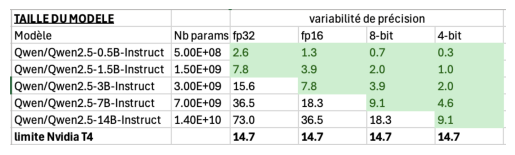

In [ ]:
# @title Taille de modèle en GB en fonction du nb de paramètres
import cv2
import matplotlib.pyplot as plt

# Chargement avec OpenCV
image = cv2.imread(filename)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Affichage
plt.imshow(image)
plt.axis('off')
plt.show()


### 🎢 **C'est parti !**


🚨 Il est possible que vous ayez besoin de créer un compte et vous authentifier à Huggingface pour telecharger certains modèles, il faudra renseigner le secret lié à votre compte  
HF_TOKEN = XXXX



### **Partie 1 : Comparons les émissions de différentes tâches**

In [ ]:
%%capture
!pip install codecarbon

In [ ]:
# @title 📍 Quelques utilitaires pour manipuler, imprimer et plotter les réponses

# Hardware and model information
import torch

def print_gpu_memory():
    if torch.cuda.is_available():
        vram_reserved = torch.cuda.memory_reserved(0) / (1024 ** 3)
        vram_total = torch.cuda.get_device_properties(0).total_memory / (1024 ** 3)
        vram_available = vram_total - vram_reserved
        print(f"VRAM : {vram_reserved:.2f} / {vram_total:.2f} GB ({vram_available:.2f} GB disponibles)")

def print_model_size(model):
  if not model:
    raise ValueError("Invalid model format")
  total_params = sum(p.numel() for p in model.parameters())
  total_bytes = total_params * model.parameters().__next__().element_size()
  print(f"{model.name_or_path} : {total_bytes / (1024 ** 3):.2f} GB")

# Processing and formatting the response
def get_response(response):
  # response doit etre soit un dict avec deux clefs (question, response), soit le résultat d'un appel avec une pipeline hf
  if isinstance(response, dict):
      question = response.get('question', '')
      answer = response.get('response', '')[0]
  else:
    question = response[0]['generated_text'][0]['content']
    answer = response[0]['generated_text'][1]['content']
  if not answer:
    raise ValueError("Invalid response format")
  return question, answer

def get_context_window(tokenizer, question, answer):
  input_tokens = len(tokenizer.encode(question))
  output_tokens = len(tokenizer.encode(answer))
  return input_tokens + output_tokens

def get_input_output_tokens(tokenizer, question, answer):
  input_tokens = len(tokenizer.encode(question))
  output_tokens = len(tokenizer.encode(answer))
  return input_tokens, output_tokens

def format_response(response):
  question, answer = get_response(response)
  words = answer.split()
  print('| Question:\n', question)
  print('| Answer:')
  for line in answer.split('. '):
    print(f'{line}.')
  print()

def format_results(
    task_name,
    codecarbon_results,
    response, # response of the pipeline/llm
    tokenizer
    ):
  def _format(val, unit):
    return f"{val:.2e} {unit}" if val < 1e-3 else f"{val:.4f} {unit}"
  question, answer = get_response(response)
  nb_tokens = get_context_window(tokenizer, question, answer)
  if not hasattr(codecarbon_results, 'emissions'):
    raise ValueError("Invalid 'codecarbon_results' format")
  emissions = codecarbon_results.emissions
  print(f"| {task_name:<15} "
        f"| {nb_tokens:>4} tokens"
        f"| GHG emissions : {_format(emissions, 'kgCO2eq')} ({_format(emissions/nb_tokens, 'kgCO2eq')}/token) |"
        )

def format_tracker_data(tracker):
  if not hasattr(tracker, 'final_emissions_data'):
    raise ValueError("Invalid 'tracker', try stopping the tracker before calling this function")
  print('\ntracker data :')
  for k, v in tracker.final_emissions_data.values.items():
    print(f"{k:<20}: {v}")

# Getting the response into a dataframe
import pandas as pd

def new_dataframe():
  return pd.DataFrame({
    "task": pd.Series(dtype="str"),
    "tokens": pd.Series(dtype="int"),
    "tokens_input": pd.Series(dtype="int"),
    "tokens_output": pd.Series(dtype="int"),
    "input_ratio": pd.Series(dtype="float"),
    "emissions": pd.Series(dtype="float"),
    "emissions_per_token": pd.Series(dtype="float"),
    "emissions_input": pd.Series(dtype="float"),
    "emissions_input_per_token": pd.Series(dtype="float"),
})

def add_data(df, task_name, results, response, tokenizer):
  question, answer = get_response(response)
  tokens_input, tokens_output = get_input_output_tokens(tokenizer, question, answer)
  tokens = tokens_input + tokens_output
  emissions = results.emissions
  emissions_per_token = round(emissions / tokens, 10) if tokens else 0

  new_row = pd.DataFrame([{
      "task": task_name,
      "tokens": tokens,
      "tokens_input": tokens_input,
      "tokens_output": tokens_output,
      "input_ratio" : tokens_input / tokens,
      "emissions": emissions,
      "emissions_per_token": emissions_per_token,
      "emissions_input" : emissions * (tokens_input / tokens),
      "emissions_input_per_token" : emissions_per_token * (tokens_input / tokens),
  }])

  return pd.concat([df, new_row], ignore_index=True)

# Plotting
import numpy as np
import matplotlib.pyplot as plt

def plot_results(df):
  fig, axes = plt.subplots(1, 2, figsize=(16, 5))
  x = np.arange(len(df))
  width = 0.6

  # First plot
  axes[0].bar(x, df["emissions_input"], width, label="% input tokens")
  axes[0].bar(x, df["emissions"], width, bottom=df["emissions_input"], label="% output tokens")

  ax2 = axes[0].twinx()
  ax2.plot(x, df["tokens"], color="black", marker="o", label="total tokens")

  axes[0].set_xticks(x)
  xtick_labels = df["task"] + "\n(" + df["tokens"].astype(str) + " tokens)"
  axes[0].set_xticklabels(xtick_labels, rotation=45)
  axes[0].set_title("Emissions GES (kgCO₂eq)")
  axes[0].legend(loc="upper left")
  ax2.legend(loc="center left")

  # Second plot
  axes[1].bar(x, df["emissions_input_per_token"], width, label="% input tokens")
  axes[1].bar(x, df["emissions_per_token"], width, bottom=df["emissions_input_per_token"], label="% output tokens")

  axes[1].set_xticks(x)
  axes[1].set_xticklabels(df["task"], rotation=45)
  axes[1].set_title("Emissions GES par Token (kgCO₂eq)")
  axes[1].legend()

  plt.tight_layout()
  plt.show()

In [ ]:
# @title On initialise notre pipeline

from transformers import pipeline
from codecarbon import EmissionsTracker

# On instancie notre tracker
my_tracker = ### YOUR CODE HERE ###

# On charge le modèle
model_name = ### YOUR CODE HERE ###

pipe = pipeline(
    "text-generation",
    model=model_name
    )


In [ ]:
# @title 🧑‍🏫 On initialise notre pipeline - Correction

from transformers import pipeline
from codecarbon import EmissionsTracker

# On instancie notre tracker
my_tracker = EmissionsTracker(
    measure_power_secs=5,
    log_level="error"
    )

# On charge le modèle
model_name = "Qwen/Qwen2.5-1.5B-Instruct"
print('model_name', model_name)

pipe = pipeline(
    "text-generation",
    model=model_name
    )


[codecarbon WARNING @ 00:30:39] Multiple instances of codecarbon are allowed to run at the same time.


model_name Qwen/Qwen2.5-1.5B-Instruct


config.json:   0%|          | 0.00/660 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/3.09G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/242 [00:00<?, ?B/s]

tokenizer_config.json: 0.00B [00:00, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

Device set to use cuda:0


In [ ]:
# @title Vérifions la taille du modèle

print_model_size(pipe.model)
print_gpu_memory()

Qwen/Qwen2.5-1.5B-Instruct : 2.88 GB
VRAM : 3.06 / 14.74 GB (11.68 GB disponibles)


In [ ]:
# @title On mesure notre baseline
prompt = """Who are you ?"""
messages = [
    {"role": "user", "content": prompt},
]

my_tracker.start_task('baseline')

response_baseline = pipe(messages, max_new_tokens=200)

baseline = my_tracker.stop_task()

format_response(response_baseline)
format_results('baseline', baseline, response_baseline, pipe.tokenizer)

| Question:
 Who are you ?
| Answer:
I am Qwen, an AI language model developed by Alibaba Cloud.
I can assist with various tasks such as answering questions, generating text based on prompts, and providing information on different topics.
How may I help you today?.

| baseline        |   49 tokens| GHG emissions : 3.38e-05 kgCO2eq (6.91e-07 kgCO2eq/token) |


In [ ]:
# @title 📝 Template : vous pouvez utiliser ce template pour coder vos tâches
prompt = """
#YOUR CODE HERE
"""
messages = [
    {"role": "user", "content": prompt},
]

my_tracker.start_task('task_XYZ')#YOUR CODE HERE

response_XYZ = pipe(messages, max_new_tokens=500)#YOUR CODE HERE

XYZ = my_tracker.stop_task()#YOUR CODE HERE

format_response(response_XYZ)#YOUR CODE HERE
format_results('task_XYZ', XYZ, response_XYZ, pipe.tokenizer)#YOUR CODE HERE

In [ ]:
# @title 🧑‍🏫 Tâche : Traduction courte - Correction
prompt = """
Est-ce que tu peux me traduire la phrase suivante en anglais :
L'energie la plus verte c'est c'elle qu'on ne consomme pas
"""
messages = [
    {"role": "user", "content": prompt},
]

my_tracker.start_task('translation')

response_translation = pipe(messages, max_new_tokens=500)

translation = my_tracker.stop_task()

format_response(response_translation)
format_results('translation', translation, response_translation, pipe.tokenizer)

| Question:
 
Est-ce que tu peux me traduire la phrase suivante en anglais :
L'energie la plus verte c'est c'elle qu'on ne consomme pas

| Answer:
The greenest energy is the one we don't use.
Cette traduction correspond bien à l'idée de "l'énergie la plus verte", qui signifie une source d'énergie sans impact environnemental ou minimale.
Le deuxième mot "on" dans le français original est remplacé par "we" pour s'accorder avec le sujet du verbe "donner"..

| translation     |  114 tokens| GHG emissions : 1.28e-05 kgCO2eq (1.12e-07 kgCO2eq/token) |


In [ ]:
# @title 🧑‍🏫 Tâche : Email - Correction
prompt = """
Peux tu rédiger un message slack à envoyer à mon client pour lui suggérer d'intégrer des mesures d'emission carbone au projet en mentionnant 3 arguments importants
"""
messages = [
    {"role": "user", "content": prompt},
]

my_tracker.start_task('email')

response_email = pipe(messages, max_new_tokens=1000)

email = my_tracker.stop_task()

format_response(response_email)
format_results('email', email, response_email, pipe.tokenizer)

| Question:
 
Peux tu rédiger un message slack à envoyer à mon client pour lui suggérer d'intégrer des mesures d'emission carbone au projet en mentionnant 3 arguments importants

| Answer:
Voici une suggestion de message Slack que vous pouvez utiliser :

"Bonjour [Nom du Client],

Je voudrais vous faire part de l'importance de prendre en compte les émissions carbone dans le projet que nous développons ensemble.

1.
**Impact sur notre planète**: Les activités industrielles ont une forte empreinte carbone qui affecte nos ressources naturelles et notre environnement.
Intégrer ces mesures permettra non seulement de minimiser cette empreinte mais aussi contribuer à la lutte contre le changement climatique.

2.
**Développement durable**: Une approche responsable des émissions carbone est une clé pour atteindre nos objectifs de développement durable.
Cela signifie optimiser notre utilisation des ressources, réduire nos impacts négatifs et améliorer nos performances écologiques.

3.
**Résilien

In [ ]:
# @title 🧑‍🏫 Tâche : Compte-rendu - Correction
prompt = """
Tu peux rédiger un compte rendu détaillé de cette demi-journée d’activités autour de la Green AI ?

**Objectifs de la session :**
1. Sensibilisation aux enjeux environnementaux et à l'impact de l’IA.
2. Familiarisation avec des outils de mesure de l’empreinte carbone (CodeCarbon, Ecologit).
3. Découverte de techniques d’optimisation des modèles (distillation, quantization, fine-tuning).

**Programme de l’après-midi :**

**12:30 - 14:00 | Lunch**

**14:00 - 15:45 | Interventions**
- **14:00 - 14:45 | Contexte environnemental – Carbon4**
  - Enjeux énergie-climat : évolution des émissions mondiales, accords de Paris, rôle du numérique.
  - Spécificités de l’IA : manque de transparence des acteurs, chaîne de valeur, impacts environnementaux (carbone, eau, matière).
  - Focus sur les LLMs : ordre de grandeur des émissions liées à l’inférence, rôle du prompt et du modèle.
  - Leviers d’action pour développeurs et utilisateurs.
  - Concepts clés : ACV vs empreinte carbone, mix énergétique, limites planétaires, CO2eq.

- **14:45 - 15:45 | Mesure et optimisation – CodeCarbon & Pruna.ai**
  - Présentation de bibliothèques de mesure (CodeCarbon, Ecologit) et de méthodologies associées.
  - Techniques d’optimisation
  - Session conclue par 15 min de questions/réponses.

**15:45 - 17:00 | Mise en pratique**
- Présentation du TP et répartition en binômes.
- Expérimentations sur deux notebooks : mesure d’une inférence de base, comparaison de modèles (distillés, quantifiés), installation de CodeCarbon dans un environnement de fine-tuning.
- Bonus : fine-tuning rapide sur 500 obs, 5 min de training.

**17:00 - 18:00 | Conclusion & Discussions**
- Récapitulatif des outils vus et bonnes pratiques.
- Pitchs : O by Octo, ROPE, Green AI.
- Discussion collective :
  - Est-ce un sujet évoqué avec vos clients ?
  - Mesurez-vous déjà l’empreinte environnementale en mission ?
  - Avez-vous intégré des logiques d’optimisation de modèles ?
  - Quelles sont les contraintes à l’intégration en mission ?
  - Peut-on justifier l’empreinte carbone de l’IA générative par ses usages ?
  - L’optimisation énergétique pourrait-elle paradoxalement aggraver la consommation ?
  - Faut-il réglementer, plafonner ou taxer les modèles IA en fonction de leur impact ?
  - Qui porte la responsabilité : chercheurs, entreprises, États, utilisateurs ?

Merci de structurer le compte rendu autour des objectifs, des temps forts et des enseignements clés de la session.
"""

messages = [
    {"role": "user", "content": prompt},
]

my_tracker.start_task('cr')

response_cr = pipe(messages, max_new_tokens=2000)

cr = my_tracker.stop_task()

format_response(response_cr)
format_results('cr', cr, response_cr, pipe.tokenizer)

| Question:
 
Tu peux rédiger un compte rendu détaillé de cette demi-journée d’activités autour de la Green AI ?

**Objectifs de la session :**
1. Sensibilisation aux enjeux environnementaux et à l'impact de l’IA.
2. Familiarisation avec des outils de mesure de l’empreinte carbone (CodeCarbon, Ecologit).
3. Découverte de techniques d’optimisation des modèles (distillation, quantization, fine-tuning).

**Programme de l’après-midi :**

**12:30 - 14:00 | Lunch**

**14:00 - 15:45 | Interventions**
- **14:00 - 14:45 | Contexte environnemental – Carbon4**
  - Enjeux énergie-climat : évolution des émissions mondiales, accords de Paris, rôle du numérique.
  - Spécificités de l’IA : manque de transparence des acteurs, chaîne de valeur, impacts environnementaux (carbone, eau, matière).
  - Focus sur les LLMs : ordre de grandeur des émissions liées à l’inférence, rôle du prompt et du modèle.
  - Leviers d’action pour développeurs et utilisateurs.
  - Concepts clés : ACV vs empreinte carbone, mix 

In [ ]:
# @title 🧑‍🏫 Tâche : Générer du contenu de formation - Correction
prompt = """
Tu es un expert en intelligence artificielle et en transition écologique. Rédige un rapport très détaillé, destiné à un public technique et décisionnaire, sur le thème de la **Green AI**. Ton objectif est de produire un contenu riche, structuré et approfondi, d’environ 5 000 tokens.

Le rapport doit comporter au minimum les sections suivantes :

1. **Introduction**
   - Définition de la Green AI.
   - Contexte global : urgence climatique, numérique et environnement, rôle de l’IA dans les émissions.

2. **Impacts environnementaux de l’IA**
   - Empreinte carbone du cycle de vie d’un modèle (entraînement, inférence, stockage).
   - Autres impacts environnementaux : consommation d’eau, extraction de métaux, déchets électroniques.
   - Chiffres clés (ordres de grandeur, comparaisons inter-sectorielles).

3. **Cas spécifique des modèles de langage (LLMs)**
   - Coût environnemental de l’entraînement de modèles type GPT, LLaMA, Gemini.
   - Coût de l’inférence (par requête, par token, selon la taille du modèle).
   - Influence de la taille des prompts et des modèles sur l’impact.
   - Problématique de la transparence des grands acteurs.

4. **Méthodologies de mesure**
   - Présentation des métriques : CO2eq, ACV, PUE, WUE.
   - Présentation d’outils comme CodeCarbon, EcoLogits.
   - Limites actuelles des outils (granularité, scope, hypothèses).

5. **Optimisation environnementale des modèles**
   - Techniques : distillation, quantization, pruning.
   - Approches software : batching, context compression, fine-tuning, distillation.
   - Approches hardware : infrastructure sobre, GPUs vs TPUs, cloud vs edge.

6. **Réglementation et cadre politique**
   - Initiatives existantes (AI Act, CSRD).
   - Propositions : seuils d’émissions, régulation de la taille des modèles, obligations de transparence.
   - Freins à la régulation et enjeux de souveraineté.

7. **Cas d’usage, dilemmes éthiques et perspectives**
   - L’IA au service de l’environnement (AI for Green).
   - Dilemme IA générative : solution ou problème ?
   - L’effet rebond et paradoxe de Jevons.
   - Responsabilité : développeurs, entreprises, États, utilisateurs.

8. **Conclusion**
   - Principaux leviers d’action.
   - Nécessité d’un changement de paradigme dans le développement et l’usage de l’IA.

Structure bien ton texte avec des titres, des sous-titres, des paragraphes détaillés et clairs. N’hésite pas à illustrer avec des exemples concrets, des chiffres, des références scientifiques ou industrielles. Ton style doit être fluide, professionnel, informatif.

Tu peux également proposer des pistes d’actions concrètes à la fin de chaque section pour renforcer l’impact.

Le texte généré doit etre long et exhaustif**.
"""
messages = [
    {"role": "user", "content": prompt},
]

my_tracker.start_task('formation')

response_formation = pipe(messages, max_new_tokens=10000)

formation = my_tracker.stop_task()

format_response(response_formation)
format_results('formation', formation, response_formation, pipe.tokenizer)

| Question:
 
Tu es un expert en intelligence artificielle et en transition écologique. Rédige un rapport très détaillé, destiné à un public technique et décisionnaire, sur le thème de la **Green AI**. Ton objectif est de produire un contenu riche, structuré et approfondi, d’environ 5 000 tokens.

Le rapport doit comporter au minimum les sections suivantes :

1. **Introduction**
   - Définition de la Green AI.
   - Contexte global : urgence climatique, numérique et environnement, rôle de l’IA dans les émissions.

2. **Impacts environnementaux de l’IA**
   - Empreinte carbone du cycle de vie d’un modèle (entraînement, inférence, stockage).
   - Autres impacts environnementaux : consommation d’eau, extraction de métaux, déchets électroniques.
   - Chiffres clés (ordres de grandeur, comparaisons inter-sectorielles).

3. **Cas spécifique des modèles de langage (LLMs)**
   - Coût environnemental de l’entraînement de modèles type GPT, LLaMA, Gemini.
   - Coût de l’inférence (par requête, par

In [ ]:
# @title On n'oublie pas de stopper le tracker avant de passer à la suite

my_tracker.stop()
# format_tracker_data(my_tracker)

/usr/local/lib/python3.11/dist-packages/codecarbon/output_methods/file.py:90: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, new_df], ignore_index=True)


0.003146963239440745

In [ ]:
# @title Maintenant, comparons les résultats -> ajoutez vos résultats

# Commentez ces lignes si vous ne faites pas les mêmes taches qu'ici :
format_results('baseline', baseline, response_baseline, pipe.tokenizer)
format_results('translation', translation, response_translation, pipe.tokenizer)
format_results('email', email, response_email, pipe.tokenizer)
format_results('cr', cr, response_cr, pipe.tokenizer)
format_results('formation', formation, response_formation, pipe.tokenizer)

# Pour imprimer une nouvelle tâche :
# format_results('task_XYZ', XYZ, response_XYZ, tokenizer)

## YOUR CODE HERE ##

| baseline        |   48 tokens| GHG emissions : 7.18e-06 kgCO2eq (1.50e-07 kgCO2eq/token) |
| translation     |  114 tokens| GHG emissions : 1.28e-05 kgCO2eq (1.12e-07 kgCO2eq/token) |
| email           |  440 tokens| GHG emissions : 6.68e-05 kgCO2eq (1.52e-07 kgCO2eq/token) |
| cr              | 1643 tokens| GHG emissions : 1.70e-04 kgCO2eq (1.03e-07 kgCO2eq/token) |
| formation       | 3768 tokens| GHG emissions : 6.94e-04 kgCO2eq (1.84e-07 kgCO2eq/token) |


In [ ]:
# @title On crée un dataframe avec les résultats -> ajoutez vos résultats

task_df = new_dataframe()

# Commentez ces lignes si vous ne faites pas les mêmes taches qu'ici :
task_df = add_data(task_df, 'baseline', baseline, response_baseline, pipe.tokenizer)
task_df = add_data(task_df, 'translation', translation, response_translation, pipe.tokenizer)
task_df = add_data(task_df, 'email', email, response_email, pipe.tokenizer)
task_df = add_data(task_df, 'cr', cr, response_cr, pipe.tokenizer)
task_df = add_data(task_df, 'formation', formation, response_formation, pipe.tokenizer)

# Pour rajouter une nouvelle tâche :
# df = add_data(df, 'task_XYZ', XYZ, response_XYZ, tokenizer)

## YOUR CODE HERE ##

task_df

,task,tokens,tokens_input,tokens_output,input_ratio,emissions,emissions_per_token,emissions_input,emissions_input_per_token
0,baseline,48,4,44,0.083333,0.000007,1.495000e-07,5.981421e-07,1.245833e-08
1,translation,114,35,79,0.307018,0.000013,1.123000e-07,3.928882e-06,3.447807e-08
2,email,440,45,395,0.102273,0.000067,1.518000e-07,6.829116e-06,1.552500e-08
3,cr,1643,757,886,0.460743,0.000170,1.035000e-07,7.834710e-05,4.768685e-08
4,formation,3768,763,3005,0.202495,0.000694,1.842000e-07,1.405097e-04,3.729952e-08


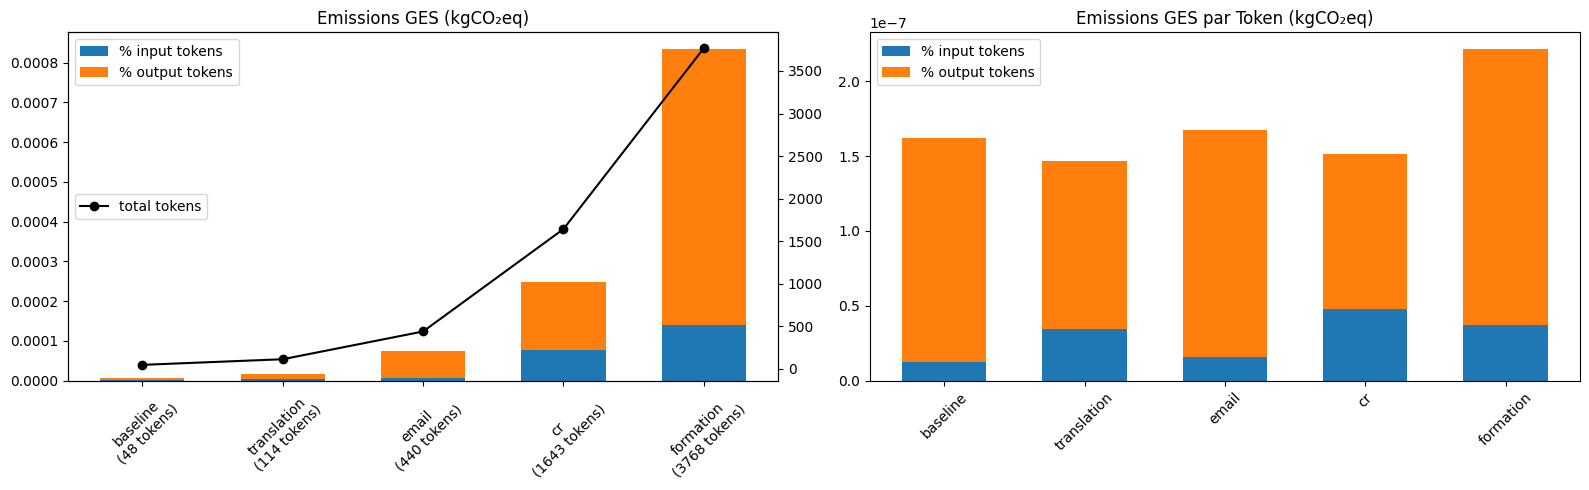

In [ ]:
# @title Comparons les emissions des différentes taches

plot_results(task_df)

#### ⭐ Notes sur l'impact de la longueur du prompt et de la génération

Dans le graphique ci dessus nous avons montré la répartition des émissions en fonction du type de token, c'est une simplification pour ce notebook mais il faut garder en tête que **les tokens d'entrée (input/prompt) et de sortie (output/génération) n'ont pas le même coût de traitement** :
- Input = lecture des tokens → passage unique dans les couches du modèle → coût modéré.
- Output = génération de tokens → boucle itérative : à chaque token généré, le modèle repasse sur l'ensemble du contexte (prompt + tokens déjà générés), applique un softmax sur tout le vocabulaire, puis effectue un sampling → beaucoup plus coûteux.

👉 Plus on génère de tokens, plus le coût augmente, car le contexte s'allonge, et l'attention doit être recalculée sur une séquence de plus en plus grande à chaque étape.

💡 Mais on peut en général **bénéficier d'une efficacité d'échelle sur les émissions par token avec l'augmentation du nombre de token** (prompt + generation).  
⚠️ A noter : Dans ce notebook nous travaillons sur une petite échelle et les résultats peuvent être très variables.  

Quelques remarques à ce sujet:
- Les requêtes aux LLM présentent une économie d'échelle : les émissions par token diminuent avec la taille du prompt, car les coûts fixes sont amortis sur plus de tokens.
- Cette économie est valable jusqu'à un certain seuil, au-delà duquel les coûts peuvent stagner ou augmenter, surtout à l'approche de la taille maximale du contexte.
- La cause principale est la complexité quadratique de l'attention (O(n²) : n comparaisons pour chaque n token), qui rend chaque ajout de token de plus en plus coûteux en calcul et mémoire.
- Le point de retournement dépend du modèle et de l'infrastructure sous-jacente (VRAM disponible, architecture distribuée ou non).
- Optimiser les requêtes longues (e.g. batching, context compression) permet de maintenir une bonne efficacité et limiter l'empreinte carbone.
  - **batching** : grouper plusieurs requêtes pour les traiter en une seule passe → moins d'énergie par requête (jusqu'à un certain seuil) *(ex. traiter 10 prompts courts d'un coup plutôt qu'un par un.)*
  - **context compression** : optimiser la taille du prompt (ex. résumer les parties longues, redondantes pour ne garder que le pertinent, enlever les metadonnées, extraire les chunks pertinents (RAG)) →

✅ Bonnes pratiques:
- Diminuer le nombre de requetes
- Optimiser les requetes pour ne retenir que les informations pertinentes et utiliser une même requete pour traiter plusieurs taches lorsque c'est possible


### **Partie 2 - Comparons les émissions sur la même tache avec des modalités différentes**



👉 Libre à vous d'explorer les situations qui vous intéressent, et que ce soit une ou 5 configurations.   
Cette liste est donnée à titre d'exemple, pour vous inspirer :)

⚡ Nous avons préparé un template plus bas que vous pouvez utiliser comme base pour faire la partie 2.

Pour rappel voici les exemples que vous pouvez reproduire:
- Comparez les émissions **sur la même tache** avec des modalités différentes, par exemple  :
  - pour des [zones géographiques différentes](https://app.electricitymaps.com/map/72h/hourly) - utilisez ces [codes région](https://github.com/mlco2/codecarbon/blob/master/codecarbon/data/cloud/impact.csv)
  - entre un modèle standard et un **modèle de raisonnement** de taille équivalente
    - par ex. Qwen/Qwen2.5-1.5B-Instruct vs. Qwen/Qwen3-1.7B
    - par ex. Qwen/Qwen2.5-1.5B-Instruct vs. deepseek-ai/DeepSeek-R1-Distill-Qwen-1.5B
  - entre un modèle et sa version **quantisée**
    - par ex. Qwen/Qwen2.5-1.5B-Instruct
    - [ici la liste des modèles quantisés de Qwen/Qwen2.5-1.5B-Instruct](https://huggingface.co/models?other=base_model:quantized:Qwen/Qwen2.5-1.5B-Instruct)
  - entre un modèle **quantisé en 4-bit** et un modèle **non quantisé (FP32)** qui occupent un espace mémoire équivalent (avec le maximum de parametres pour notre GPU)
    - par ex. unsloth/Qwen2.5-14B-Instruct-bnb-4bit vs. Qwen/Qwen2.5-0.5B-Instruct
  - entre deux modèles de **taille équivalente**
    - par ex. Qwen/Qwen2.5-1.5B-Instruct vs. meta-llama/Llama-3.2-1B-Instruct



In [ ]:
# @title 🚨  N'oubliez pas de libérer les ressources du GPU pour charger de nouveaux modèles sans redémarrer le kernel
import gc

del pipe
gc.collect()
torch.cuda.empty_cache()
print_gpu_memory()

VRAM : 5.87 / 14.74 GB (8.87 GB disponibles)


In [ ]:
# @title On installe codecarbon si ce n'est pas déjà fait

%%capture
!pip install codecarbon

⚠️⚠️⚠️ Si vous redémarrez le kernel, n'oubliez pas d'éxecuter la cellule avec les utilitaires : '📍 Quelques utilitaires pour manipuler, imprimer et plotter les réponses'



In [ ]:
# @title 📝  Comparons deux zones géographiques - Template *avec OfflineEmissionsTracker*
# on peut choisir deux zones à comparer ici https://app.electricitymaps.com/map/72h/hourly
# les codes region à utiliser sont dans cette liste https://github.com/mlco2/codecarbon/blob/master/codecarbon/data/cloud/impact.csv


from transformers import pipeline
from codecarbon import OfflineEmissionsTracker # On utilise le tracker offline pour pouvoir modifier les paramètres de région

tracker_A = OfflineEmissionsTracker(
    country_iso_code="", #YOUR CODE HERE
    cloud_provider="", #YOUR CODE HERE
    cloud_region="", #YOUR CODE HERE
    measure_power_secs=5,
    log_level="error"
)

tracker_B = OfflineEmissionsTracker(
    country_iso_code="", #YOUR CODE HERE
    cloud_provider="", #YOUR CODE HERE
    cloud_region="", #YOUR CODE HERE
    measure_power_secs=5,
    log_level="error"
  )

pipe = pipeline(
    "text-generation",
    model=model_name # on peut utiliser le même modèle que précédemment
    )

prompt = "Who are you ?"
messages = [
    {"role": "user", "content": prompt},
]

tracker_A.start()
tracker_B.start()

response = pipe(messages, max_new_tokens=1500)

tracker_A.stop()
tracker_B.stop()

format_response(response)
print('Résultats')
format_results('test_A ', tracker_A.final_emissions_data, response, pipe.tokenizer)
format_results('test_B', tracker_B.final_emissions_data, response, pipe.tokenizer)

results_df = new_dataframe()
results_df = add_data(results_df, 'test_A', tracker_A.final_emissions_data, response, pipe.tokenizer)
results_df = add_data(results_df, 'test_B', tracker_B.final_emissions_data, response, pipe.tokenizer)

plot_results(results_df)

In [ ]:
# @title 📝  Comparer d'autres modalités - Template *avec EmissionsTracker*

from transformers import pipeline
from codecarbon import EmissionsTracker
import gc

tracker = EmissionsTracker(
    measure_power_secs=5,
    log_level="error"
  )

prompt = "Who are you ?"
messages = [
    {"role": "user", "content": prompt},
]

# First pipeline
baseline_pipe = pipeline(
    "text-generation",
    model="" ##YOUR CODE HERE
    )
print_model_size(baseline_pipe.model)
print_gpu_memory()


tracker.start_task('baseline')
response = baseline_pipe(messages, max_new_tokens=1500)
baseline = tracker.stop_task()

format_results('baseline ', baseline, response, baseline_pipe.tokenizer)
vs_my_task_df = new_dataframe()
vs_my_task_df = add_data(vs_my_task_df, 'baseline', baseline, response, baseline_pipe.tokenizer)

del baseline_pipe
gc.collect()
torch.cuda.empty_cache()


# Second pipeline
my_task_pipe = pipeline(
    "text-generation",
    model="" ##YOUR CODE HERE
    )
print_model_size(my_task_pipe.model)
print_gpu_memory()


tracker.start_task('my_task')
response = my_task_pipe(messages, max_new_tokens=1500)
my_task_results = tracker.stop_task()


format_response(response)
format_results('my_task', my_task_results, response, my_task_pipe.tokenizer)
vs_my_task_df = add_data(vs_my_task_df, 'my_task', my_task_results, response, my_task_pipe.tokenizer)
print(vs_my_task_df)
plot_results(vs_my_task_df)


tracker.stop()
del my_task_pipe
gc.collect()
torch.cuda.empty_cache()

[codecarbon INFO @ 10:58:31] offline tracker init
[codecarbon WARNING @ 10:58:31] Multiple instances of codecarbon are allowed to run at the same time.


config.json:   0%|          | 0.00/660 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/3.09G [00:00<?, ?B/s]

Sliding Window Attention is enabled but not implemented for `sdpa`; unexpected results may be encountered.


generation_config.json:   0%|          | 0.00/242 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/7.30k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/2.78M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/1.67M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/7.03M [00:00<?, ?B/s]

Device set to use cuda:0


| Question:
 Who are you ?
| Answer:
I am Qwen, an AI language model developed by Alibaba Cloud.
I can help answer questions and have conversations with you about various topics.
How may I assist you today?.

Résultats
| localisation_paris  |   39 tokens| GHG emissions : 2.32e-06 kgCO2eq (5.94e-08 kgCO2eq/token) |
| localisation_singap |   39 tokens| GHG emissions : 2.53e-05 kgCO2eq (6.48e-07 kgCO2eq/token) |


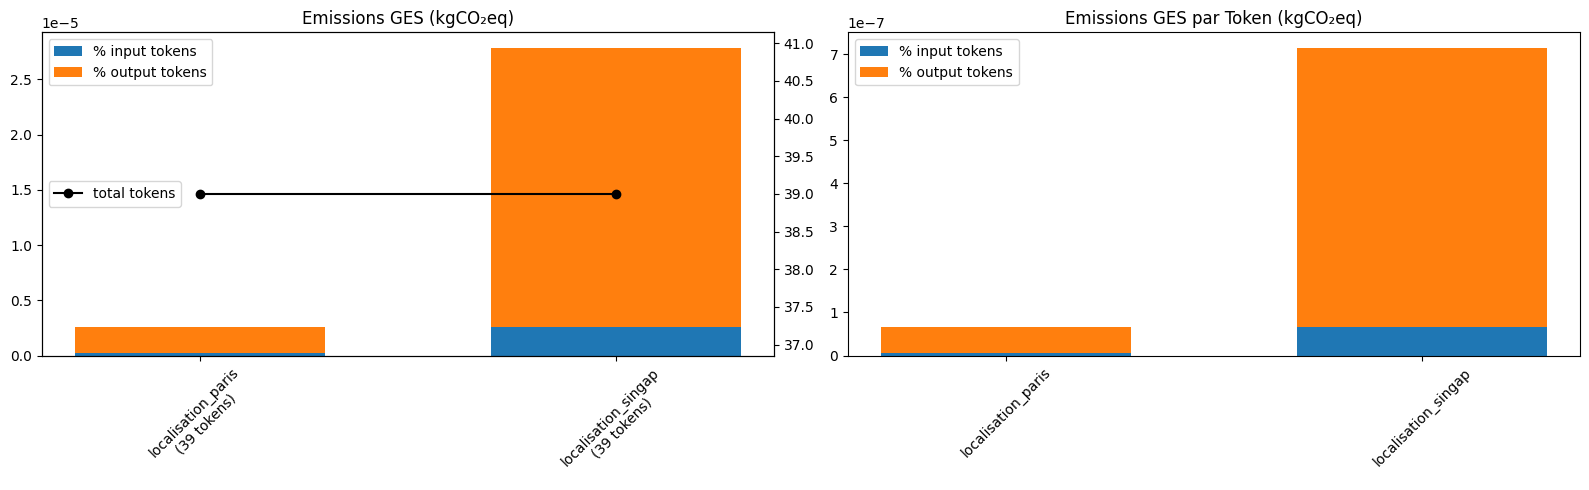

In [ ]:
# @title 🧑‍🏫  Comparons deux zones avec des mix energetiques différents - Correction
# on peut choisir deux zones à comparer ici https://app.electricitymaps.com/map/72h/hourly
# les codes region à utiliser sont dans cette liste https://github.com/mlco2/codecarbon/blob/master/codecarbon/data/cloud/impact.csv


from transformers import pipeline
from codecarbon import OfflineEmissionsTracker

paris_tracker = OfflineEmissionsTracker(
    country_iso_code="FRA",
    cloud_provider="gcp",
    cloud_region="europe-west9",
    measure_power_secs=5,
    log_level="error"
)

singapour_tracker = OfflineEmissionsTracker(
    country_iso_code="SGP",
    cloud_provider="gcp",
    cloud_region="asia-southeast1",
    measure_power_secs=5,
    log_level="error"
  )

model_name = "Qwen/Qwen2.5-1.5B-Instruct"
pipe = pipeline(
    "text-generation",
    model=model_name
    )

prompt = "Who are you ?"
messages = [
    {"role": "user", "content": prompt},
]

paris_tracker.start()
singapour_tracker.start()

response = pipe(messages, max_new_tokens=1500)

paris_tracker.stop()
singapour_tracker.stop()

format_response(response)
print('Résultats')
format_results('localisation_paris ', paris_tracker.final_emissions_data, response, pipe.tokenizer)
format_results('localisation_singap', singapour_tracker.final_emissions_data, response, pipe.tokenizer)

region_df = new_dataframe()
region_df = add_data(region_df, 'localisation_paris', paris_tracker.final_emissions_data, response, pipe.tokenizer)
region_df = add_data(region_df, 'localisation_singap', singapour_tracker.final_emissions_data, response, pipe.tokenizer)

plot_results(region_df)

Device set to use cuda:0


Qwen/Qwen2.5-1.5B-Instruct : 5.75 GB
VRAM : 11.73 / 14.74 GB (3.01 GB disponibles)
| baseline        |   53 tokens| GHG emissions : 2.04e-05 kgCO2eq (3.84e-07 kgCO2eq/token) |


config.json:   0%|          | 0.00/679 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/3.55G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/181 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/3.07k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/7.03M [00:00<?, ?B/s]

Device set to use cuda:0


deepseek-ai/DeepSeek-R1-Distill-Qwen-1.5B : 6.62 GB
VRAM : 12.59 / 14.74 GB (2.15 GB disponibles)
| Question:
 Who are you ?
| Answer:
Greetings! I'm DeepSeek-R1, an artificial intelligence assistant created by DeepSeek.
I'm at your service and would be delighted to assist you with any inquiries or tasks you may have.
</think>

Greetings! I'm DeepSeek-R1, an artificial intelligence assistant created by DeepSeek.
I'm at your service and would be delighted to assist you with any inquiries or tasks you may have..

| reasoning       |   86 tokens| GHG emissions : 3.33e-05 kgCO2eq (3.87e-07 kgCO2eq/token) |
        task  tokens  tokens_input  tokens_output  input_ratio  emissions  \
0   baseline      53             4             49     0.075472   0.000020   
1  reasoning      86             5             81     0.058140   0.000033   

   emissions_per_token  emissions_input  emissions_input_per_token  
0         3.841000e-07         0.000002               2.898868e-08  
1         3.873000e-

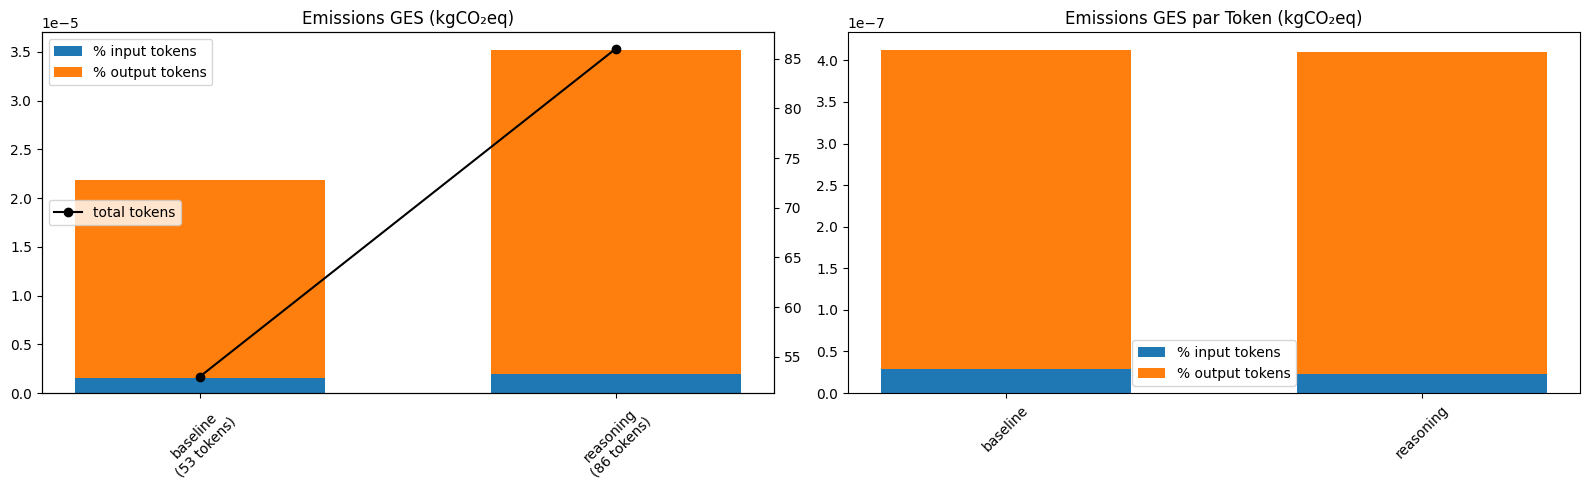

/usr/local/lib/python3.11/dist-packages/codecarbon/output_methods/file.py:90: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, new_df], ignore_index=True)


In [ ]:
# @title 🧑‍🏫  Comparons un modèle standard et un modèle de raisonnement - Correction

from transformers import pipeline
from codecarbon import EmissionsTracker
import gc

reasoning_tracker = EmissionsTracker(
    measure_power_secs=5,
    log_level="error"
  )

prompt = "Who are you ?"
messages = [
    {"role": "user", "content": prompt},
]

# First pipeline
baseline_pipe = pipeline(
    "text-generation",
    model="Qwen/Qwen2.5-1.5B-Instruct"
    )
print_model_size(baseline_pipe.model)
print_gpu_memory()


reasoning_tracker.start_task('baseline')
response = baseline_pipe(messages, max_new_tokens=1500)
baseline = reasoning_tracker.stop_task()

format_results('baseline ', baseline, response, baseline_pipe.tokenizer)
vs_reasoning_df = new_dataframe()
vs_reasoning_df = add_data(vs_reasoning_df, 'baseline', baseline, response, baseline_pipe.tokenizer)

del baseline_pipe
gc.collect()
torch.cuda.empty_cache()


# Second pipeline
reasoning_pipe = pipeline(
    "text-generation",
    model="deepseek-ai/DeepSeek-R1-Distill-Qwen-1.5B" # Qwen/Qwen3-1.7B
    )
print_model_size(reasoning_pipe.model)
print_gpu_memory()


reasoning_tracker.start_task('reasoning')
response = reasoning_pipe(messages, max_new_tokens=1500)
reasoning = reasoning_tracker.stop_task()


format_response(response)
format_results('reasoning', reasoning, response, reasoning_pipe.tokenizer)
vs_reasoning_df = add_data(vs_reasoning_df, 'reasoning', reasoning, response, reasoning_pipe.tokenizer)
print(vs_reasoning_df)
plot_results(vs_reasoning_df)


reasoning_tracker.stop()
del reasoning_pipe
gc.collect()
torch.cuda.empty_cache()

## 🌟 Bravo vous êtes arrivés à la fin du notebook ! 🌟

✅ On a utilisé `codecarbon` pour estimer les emissions de LLM pour une utilisation locale.  

🤔 Pour estimer les émissions pour des LLM au travers d'appels API, on peut utiliser `ecologit`.  
